In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.spatial import distance

In [23]:
eeg_data = loadmat('../data/sampleEEGdata.mat')
data = eeg_data['EEG']['data'][0][0]
times = eeg_data['EEG']['times'][0][0][0]
labels = list(np.hstack(eeg_data['EEG']['chanlocs'][0][0]['labels'][0]))
srate = eeg_data['EEG']['srate'][0][0][0][0]
data.shape

(64, 640, 99)

In [5]:
times2plot = np.arange(-200, 850, 50)
times2plot

array([-200, -150, -100,  -50,    0,   50,  100,  150,  200,  250,  300,
        350,  400,  450,  500,  550,  600,  650,  700,  750,  800])

In [17]:
indx2plot = []
for t in times2plot:
    indx2plot.append(np.abs(times - t).argmin())
    
indx2plot = np.array(indx2plot)
indx2plot

array([205, 218, 230, 243, 256, 269, 282, 294, 307, 320, 333, 346, 358,
       371, 384, 397, 410, 422, 435, 448, 461])

In [18]:
times[indx2plot]

array([-199.21875, -148.4375 , -101.5625 ,  -50.78125,    0.     ,
         50.78125,  101.5625 ,  148.4375 ,  199.21875,  250.     ,
        300.78125,  351.5625 ,  398.4375 ,  449.21875,  500.     ,
        550.78125,  601.5625 ,  648.4375 ,  699.21875,  750.     ,
        800.78125])

In [22]:
biosemi_montage = mne.channels.make_standard_montage('biosemi64')
info = mne.create_info(ch_names=labels, 
                       sfreq=srate,
                       ch_types='eeg')

In [24]:
erp = data.mean(2)

In [44]:
evoked = mne.EvokedArray(erp, info)
evoked.set_montage(biosemi_montage)
evoked.times = times

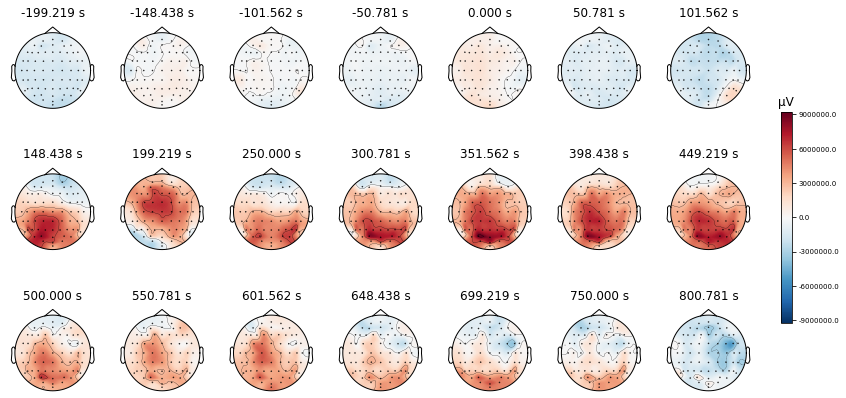

In [49]:
evoked.plot_topomap(evoked.times[indx2plot], time_unit='s', nrows='auto', ncols=7);

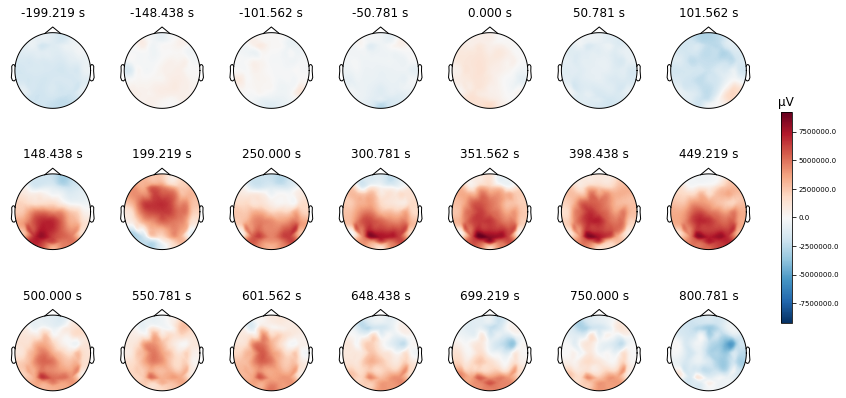

In [57]:
evoked.plot_topomap(evoked.times[indx2plot], time_unit='s', average=0.05, nrows='auto', ncols=7,
                    contours=0, sensors=False); 

In [58]:
# AR

In [61]:
car = data - data.mean(axis=0)
car = car.mean(axis=2)

In [62]:
evoked = mne.EvokedArray(car, info)
evoked.set_montage(biosemi_montage)
evoked.times = times

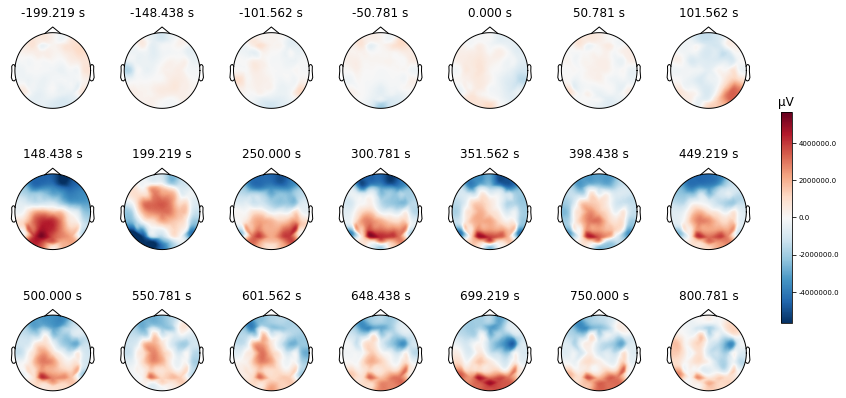

In [63]:
evoked.plot_topomap(evoked.times[indx2plot], time_unit='s', average=0.05, nrows='auto', ncols=7,
                    contours=0, sensors=False); 